In [1]:
import string
import collections

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
page = 0
text_by_page = {}
with open('printed_text_by_page.txt') as f:
    for line in f:
        if line.startswith('page'):
            page = int(line.strip().split()[-1])
            continue
        text_by_page.setdefault(page, []).append(line)

In [3]:
def words_from(list_of_lines):
    all_text = ''
    for line in list_of_lines:
        all_text += line
    for mark in '.,!-?':
        all_text = all_text.replace(mark, ' ')
    all_text = all_text.lower()
    words = all_text.split()
    return words

In [4]:
words = []
for list_of_lines in text_by_page.values():
    words.extend(words_from(list_of_lines))

In [5]:
len(words)

802

In [6]:
word_counts = collections.Counter(words).most_common()
len(word_counts)

50

In [7]:
[(count, word) for word, count in word_counts]

[(84, 'not'),
 (82, 'i'),
 (61, 'them'),
 (59, 'a'),
 (44, 'like'),
 (40, 'in'),
 (37, 'do'),
 (33, 'you'),
 (26, 'would'),
 (25, 'and'),
 (25, 'eat'),
 (21, 'will'),
 (19, 'with'),
 (16, 'sam'),
 (14, 'could'),
 (13, 'am'),
 (11, 'green'),
 (11, 'eggs'),
 (11, 'ham'),
 (11, 'here'),
 (11, 'the'),
 (9, 'there'),
 (9, 'train'),
 (8, 'or'),
 (8, 'anywhere'),
 (8, 'house'),
 (8, 'mouse'),
 (7, 'box'),
 (7, 'fox'),
 (7, 'car'),
 (7, 'on'),
 (7, 'dark'),
 (6, 'tree'),
 (5, 'say'),
 (5, 'so'),
 (4, 'may'),
 (4, 'see'),
 (4, 'let'),
 (4, 'me'),
 (4, 'be'),
 (4, 'rain'),
 (4, 'goat'),
 (4, 'try'),
 (3, 'that'),
 (3, 'boat'),
 (2, 'they'),
 (2, 'are'),
 (2, 'good'),
 (2, 'thank'),
 (1, 'if')]

In [8]:
ranks = list(range(1, 51))
counts = [count for word, count in word_counts]

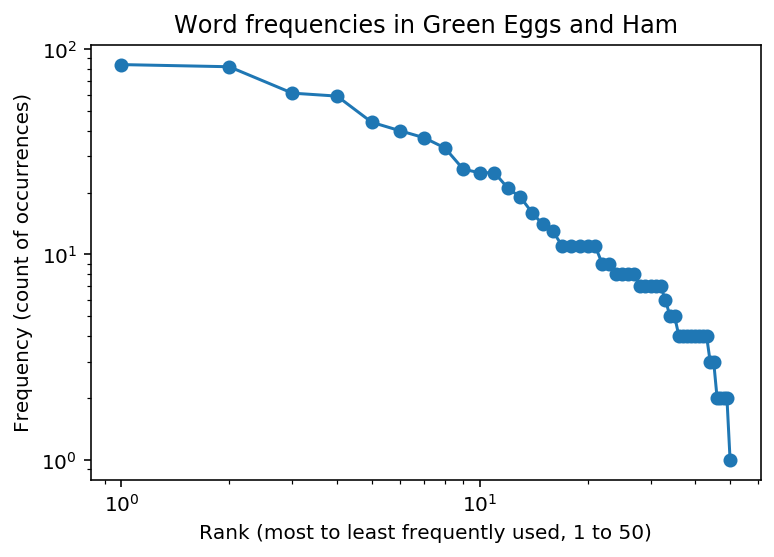

In [9]:
plt.plot(ranks, counts, 'o-')
plt.xscale("log")
plt.yscale("log")
plt.xlabel('Rank (most to least frequently used, 1 to 50)')
plt.ylabel('Frequency (count of occurrences)')
plt.title('Word frequencies in Green Eggs and Ham')
plt.savefig('frequencies_log_log.png')

In [10]:
letters = ''.join(words)
print(len(letters))
letter_counts = collections.Counter(letters)
print(len(letter_counts))
sorted(set(string.ascii_letters[:26]) - set(letter_counts.keys()))

2417
21


['j', 'p', 'q', 'v', 'z']

In [11]:
letter_counts.most_common()

[('e', 282),
 ('o', 255),
 ('t', 249),
 ('i', 220),
 ('a', 207),
 ('n', 190),
 ('h', 145),
 ('l', 130),
 ('m', 117),
 ('d', 111),
 ('u', 89),
 ('r', 86),
 ('w', 74),
 ('s', 57),
 ('y', 56),
 ('k', 53),
 ('g', 39),
 ('c', 21),
 ('b', 14),
 ('x', 14),
 ('f', 8)]

In [12]:
words_used = set()
new_words_by_page = {}
for page in range(100):
    if page not in text_by_page:
        continue
    current_words = set(words_from(text_by_page[page]))
    new_words_by_page[page] = len(current_words - words_used)
    words_used |= current_words

In [13]:
sum(new_words_by_page.values())

50

In [14]:
max(new_words_by_page.keys())

62

In [15]:
pages = list(range(1, 63))

In [16]:
total = 0
words_seen = []
for page in pages:
    total += new_words_by_page.get(page, 0)
    words_seen.append(total)

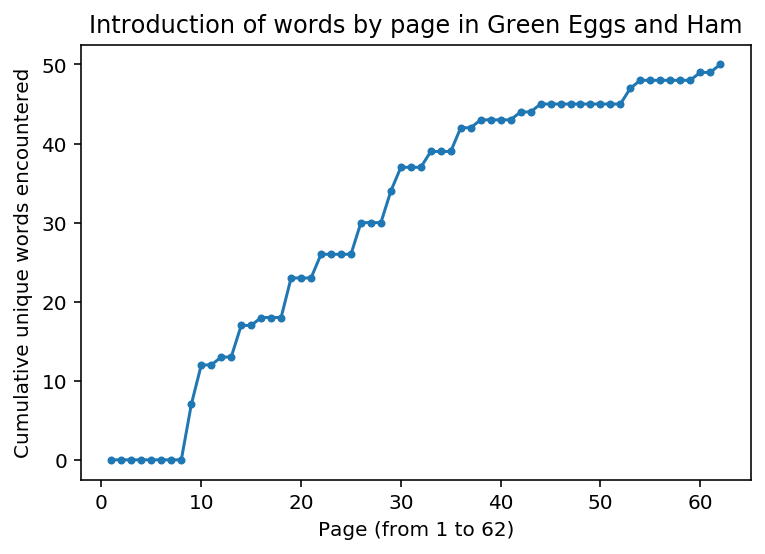

In [17]:
plt.plot(pages, words_seen, '.-')
plt.xlabel('Page (from 1 to 62)')
plt.ylabel('Cumulative unique words encountered')
plt.title('Introduction of words by page in Green Eggs and Ham')
plt.savefig('cumulative_unique_words_by_page.png')

In [18]:
words_added = []
for page in pages:
    words_added.append(new_words_by_page.get(page, 0))

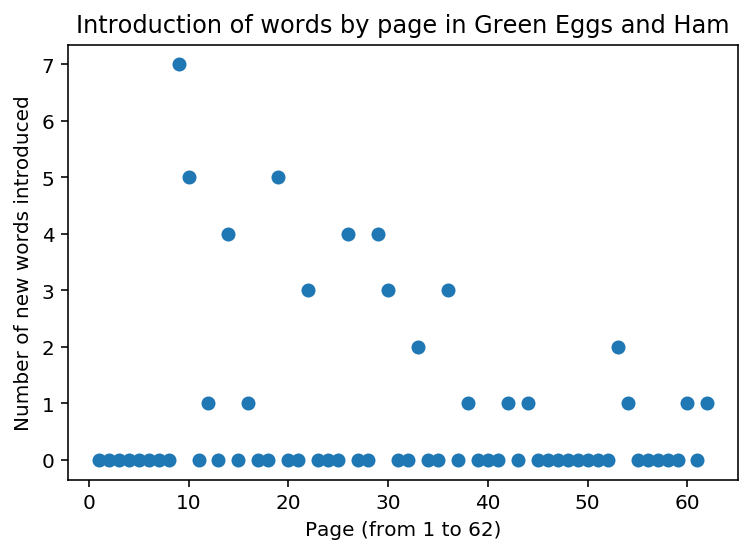

In [19]:
plt.plot(pages, words_added, 'o')
plt.xlabel('Page (from 1 to 62)')
plt.ylabel('Number of new words introduced')
plt.title('Introduction of words by page in Green Eggs and Ham')
plt.savefig('new_words_by_page.png')